# Project1: Prediction using Supervised ML

# Author: Mahmoud Reda Mahmoud Abdelwahab

## Table of contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>### **Overview**
>Using Supervised ML dataset I will complete my analysis to implement regression functions. 

>This dataset consists of two columns Hours and Scores. I will start with simple linear regression involoing two variables.    

>#### **Question that can analyised from this data set**
> 1. What is expected about percentage of marks that students may score?

<a id='wrangling'></a>
## Data Wrangling

> After observing the dataset and proposed questions for the analysis we will be keeping only relevent data deleting the unsued data so that we can make our calculation easy and understandable. 
> .

In [10]:
#importing libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [11]:
#reading dataset
Pred_data = pd.read_csv('Students Score.csv')
print("Data Loaded Successfully!")

Data Loaded Successfully!


In [13]:
Pred_data.head()

,Houres,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [14]:
Pred_data.describe()

,Houres,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


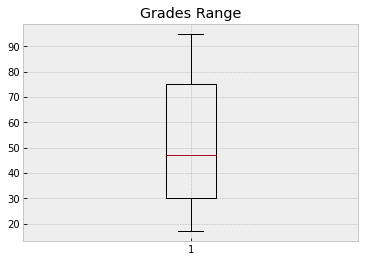

In [18]:
#Scores Distribution
plt.style.use("bmh")
fig, ax=plt.subplots()
ax.boxplot(Pred_data["Scores"])
plt.title("Grades Range")
plt.show()


> Students score is between 17 and 95 as shown!


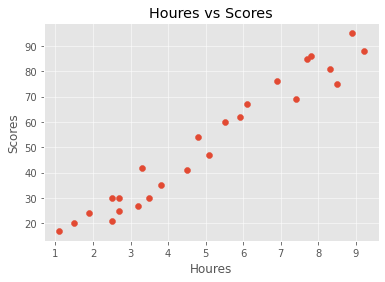

In [22]:
#plot shows Houres vs Scores
plt.style.use("ggplot")
fig, ax= plt.subplots()
ax.scatter(Pred_data["Houres"], Pred_data["Scores"])
ax.set_xlabel("Houres")
ax.set_ylabel("Scores")
plt.title("Houres vs Scores")
plt.show()

> As shown we notice that the more houres spending, the more grades scoring!

### And that declares the Positive correlation between number of hrs spent in studying, and scores accomplished.

### Wrangle dataset for prediction

In [23]:
x = Pred_data.iloc[:, :-1].values
y = Pred_data.iloc[:, -1].values

In [24]:
print(x)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


In [25]:
print(y)

[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


In [26]:
# Scikit-Learn 
from sklearn.model_selection import train_test_split 

> Then spliting data

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=0)

#### Training our scikit learn Model

In [28]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x_train, y_train)
print("Now our training model is experienced!")

Now our training model is experienced!


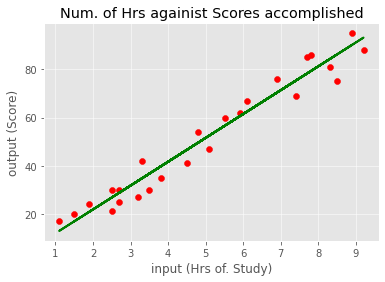

In [29]:
# Regression line plotting
line = LR.coef_*x+ LR.intercept_

# Testing Data
fig, ax= plt.subplots()
plt.scatter(x, y, color='r')
plt.plot(x, line, color='g')
ax.set_xlabel("input (Hrs of. Study)")
ax.set_ylabel("output (Score)")
plt.title("Num. of Hrs againist Scores accomplished")
plt.show()

#### After training our model now we need to predict

In [30]:
# Testing data - In Hours
print("Testing Data:", x_test)
  # Predicting the scores
y_pred = LR.predict(x_test)
print("perdicted Values:", y_pred)


Testing Data: [[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]
perdicted Values: [16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [31]:
# Comparing Actual vs Predicted
ComparisonDF = pd.DataFrame({"Actual":y_test, "Predicted":y_pred, "errorValue":y_test-y_pred})
ComparisonDF 

,Actual,Predicted,errorValue
0,20,16.884145,3.115855
1,27,33.732261,-6.732261
2,69,75.357018,-6.357018
3,30,26.794801,3.205199
4,62,60.491033,1.508967


In [33]:
# You can also test with your own data
newRecord = [[9.25]]
print("No of. Hrs = {}".format(newRecord[0][0]))
print("Predicted Score = {}".format(LR.predict(newRecord)[0]))

No of. Hrs = 9.25
Predicted Score = 93.69173248737538


## Evaluation

In [34]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002975


### Summary

> Students score is between 17 and 95 as shown! >
> As shown we notice that the more houres spending, the more grades scoring! >
> After training model, the predicted score equals 93.7 on 9.25 hrs.>
> Final step shows the model performance importance in differentiating algorithms performance on  a particular dataset. >
> There are many metrics but we choosed here the meansquare error.